In [2]:
import pandas as pd
import numpy as np

In [3]:
ipc = pd.read_csv("IPC.csv")

In [4]:
ipc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-17,49553.878906,49810.050781,49373.539063,49398.570313,49398.570313,75804000
1,2018-09-18,49412.000000,49843.589844,49395.511719,49661.828125,49661.828125,104226700
2,2018-09-19,49623.980469,49887.789063,49536.320313,49590.789063,49590.789063,129421200
3,2018-09-20,49590.980469,49812.140625,49315.390625,49510.781250,49510.781250,94879400
4,2018-09-21,49483.039063,49732.351563,49296.570313,49344.289063,49344.289063,543954900


In [10]:
ipc.set_index("Date",inplace=True)

In [42]:
ipc['Year']=[ipc.index[i][0:4] for i in range(len (ipc.index))]
ipc['Month']=[ipc.index[i][5:7] for i in range(len (ipc.index))]
ipc.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2018-09-17,49553.878906,49810.050781,49373.539063,49398.570313,49398.570313,75804000,2018,09
2018-09-18,49412.000000,49843.589844,49395.511719,49661.828125,49661.828125,104226700,2018,09
2018-09-19,49623.980469,49887.789063,49536.320313,49590.789063,49590.789063,129421200,2018,09
2018-09-20,49590.980469,49812.140625,49315.390625,49510.781250,49510.781250,94879400,2018,09
2018-09-21,49483.039063,49732.351563,49296.570313,49344.289063,49344.289063,543954900,2018,09


In [39]:
ipc.groupby('Year').mean()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2018,44908.229655,45248.558431,44478.533149,44785.523926,44785.523926,1.779503e+08
2019,42817.701655,43066.472788,42549.949789,42815.977397,42815.977397,1.592410e+08


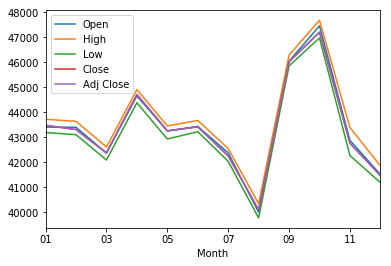

In [52]:
seasons= ipc.groupby('Month').mean()
seasons.drop(columns='Volume',inplace=True)
seasons.plot()

In [33]:
ipc.head()

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2018-09-17,49553.878906,49810.050781,49373.539063,49398.570313,49398.570313,75804000,2018
2018-09-18,49412.000000,49843.589844,49395.511719,49661.828125,49661.828125,104226700,2018
2018-09-19,49623.980469,49887.789063,49536.320313,49590.789063,49590.789063,129421200,2018
2018-09-20,49590.980469,49812.140625,49315.390625,49510.781250,49510.781250,94879400,2018
2018-09-21,49483.039063,49732.351563,49296.570313,49344.289063,49344.289063,543954900,2018


In [23]:
print(ipc.mean())
print("")
print(ipc.std())

Open         4.341977e+04
High         4.369491e+04
Low          4.310538e+04
Close        4.338321e+04
Adj Close    4.338321e+04
Volume       1.646293e+08
dtype: float64

Open         2.362065e+03
High         2.336740e+03
Low          2.347285e+03
Close        2.332827e+03
Adj Close    2.332827e+03
Volume       8.015784e+07
dtype: float64


In [34]:
np.log(ipc).diff(periods=1, axis=0).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-18,-0.002867,0.000673,0.000445,0.005315,0.005315,0.318417
2018-09-19,0.004281,0.000886,0.002847,-0.001431,-0.001431,0.216504
2018-09-20,-0.000665,-0.001518,-0.004470,-0.001615,-0.001615,-0.310466
2018-09-21,-0.002179,-0.001603,-0.000382,-0.003368,-0.003368,1.746260


In [36]:
ipc.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-18,-0.002863,0.000673,0.000445,0.005329,0.005329,0.374950
2018-09-19,0.004290,0.000887,0.002851,-0.001430,-0.001430,0.241728
2018-09-20,-0.000665,-0.001516,-0.004460,-0.001613,-0.001613,-0.266894
2018-09-21,-0.002177,-0.001602,-0.000382,-0.003363,-0.003363,4.733119


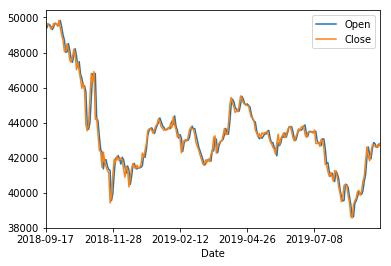

In [50]:
ipc[['Open','Close']].plot();

In [43]:
ipc['Rolling Average'] = ipc.Close.rolling(30).mean()
ipc['Rolling SD'] = ipc.Close.rolling(30).std()

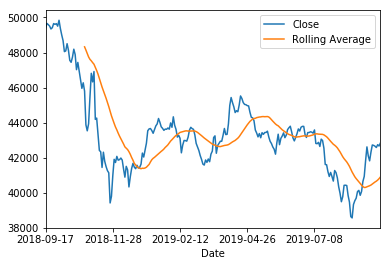

In [46]:
ipc[['Close','Rolling Average']].plot();

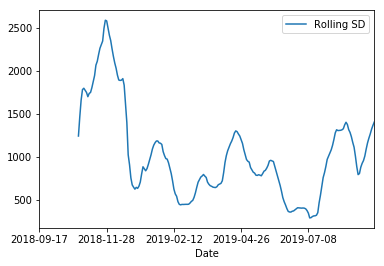

In [48]:
ipc[['Rolling SD']].plot();

In [53]:
P = pd.DataFrame({"Activo": ['IPC', 'NASDAQ', 'EUROSTOXX'],
                   "Precio": [np.nan, 42032, 12530],
                   "Fecha": [pd.NaT, pd.Timestamp("2018-04-25"),
                             pd.NaT]})

In [54]:
P

,Activo,Precio,Fecha
0,IPC,NaN,NaT
1,NASDAQ,42032.0,2018-04-25
2,EUROSTOXX,12530.0,NaT


In [56]:
# Descarta las filas donde falta al menos un elemento.
P.dropna()

,Activo,Precio,Fecha
1,NASDAQ,42032.0,2018-04-25


In [57]:
#Descarta las columnas donde falta al menos un elemento.
P.dropna(axis = 'columns')

,Activo
0,IPC
1,NASDAQ
2,EUROSTOXX


In [59]:
#Descarta las filas donde faltan todos los elementos.
P.dropna(how='all')

,Activo,Precio,Fecha
0,IPC,NaN,NaT
1,NASDAQ,42032.0,2018-04-25
2,EUROSTOXX,12530.0,NaT


In [60]:
#Mantiene solo las filas con al menos 2 valores no NA.
P.dropna(thresh=2)

,Activo,Precio,Fecha
1,NASDAQ,42032.0,2018-04-25
2,EUROSTOXX,12530.0,NaT


In [61]:
#Definir en qué columnas buscamos los valores faltantes
P.dropna(subset=['Activo', 'Fecha'])

,Activo,Precio,Fecha
1,NASDAQ,42032.0,2018-04-25


In [62]:
#Mantener el DataFrame con entradas válidas en la misma variable.
P.dropna(inplace=True)
P

,Activo,Precio,Fecha
1,NASDAQ,42032.0,2018-04-25
